# Logistic Regression for Identifying Depression Among Students

# Overview
In this task, you will use Logistic Regression to predict whether a student is experiencing depression based on different factors such as academic pressure, sleep habits, and financial stress. You will go through the full machine learning process, from exploring the data to training and evaluating a model. You are also encouraged to create visualizations to better understand the data and support your analysis.

## Dataset
We will use the Student Depression Dataset (good timing after mid term exam I guess).

### Features:
- **Gender**: Male/Female
- **Age**: Student’s age
- **City**: City where the student lives
- **Academic Pressure**: Level of academic stress
- **Work Pressure**: Level of work-related stress
- **CGPA**: Student’s academic performance
- **Study Satisfaction**: How satisfied the student is with their studies
- **Job Satisfaction**: Satisfaction with a job (if applicable)
- **Sleep Duration**: Sleep hours category (e.g., "Less than 5 hours", "5-6 hours")
- **Dietary Habits**: Eating habits (e.g., Healthy, Moderate)
- **Degree**: The degree the student is pursuing
- **Suicidal Thoughts**: Whether the student has had suicidal thoughts (Yes/No)
- **Work/Study Hours**: Hours spent working or studying daily
- **Financial Stress**: Level of financial pressure
- **Family History of Mental Illness**: Whether the student has a family history of mental illness (Yes/No)
- **Depression**: (Target variable: 1 = Has depression, 0 = No depression)

## Tasks 
### **Use the df DataFrame from the cell below for all tasks.**
### Task 1 – Explore the Data
    Understand the dataset and find interesting patterns :
        - Use basic pandas functions to check the data.
        - Look for missing values, outliers, and patterns in the features.
        - Create visualizations such as heatmap, histograms, bar charts, scatter plots etc. to explore relationships between different features and depression.

### Task 2 – Data Preprocessing
    Clean and prepare the data for modeling : 
        - Handle missing values (e.g., filling or removing them). 
        - Convert categorical variables into numbers using encoding. 
        - Normalize or standardize numerical features if needed.
        - Explain why you made certain preprocessing choices.

### Task 3 – Train the Model
    Train a Logistic Regression model to predict depression : 
        - Split the data into training and testing sets.
        - Train a Logistic Regression model using scikit-learn. Look at the different parameters in scikit learn libraries ant try to change some of them (only if you can understand them).
        - Make predictions on the test data.

### Task 4 – Evaluate the Model
    Measure how well the model performs : 
        - Calculate accuracy, precision, recall, and F1-score.
        - Create a confusion matrix to see how often the model makes correct and incorrect predictions.
        - Plot an ROC curve to analyze model performance.
        - Think on how we could analyse predicted probabilities

#### Some documentation 

[Seaborn Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
[Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
(There are many different plots and possible analysis to do with Seaborn. Navigate by yourself and feel free to do some insighful analysis)

[Imputing values](https://scikit-learn.org/stable/modules/impute.html)

[scikit-learn preprocessing documentation](https://scikit-learn.org/stable/modules/preprocessing.html)

[Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[Classification metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

### Solution Part 1

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8

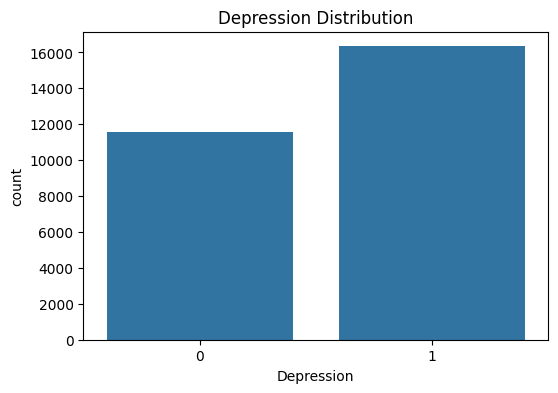

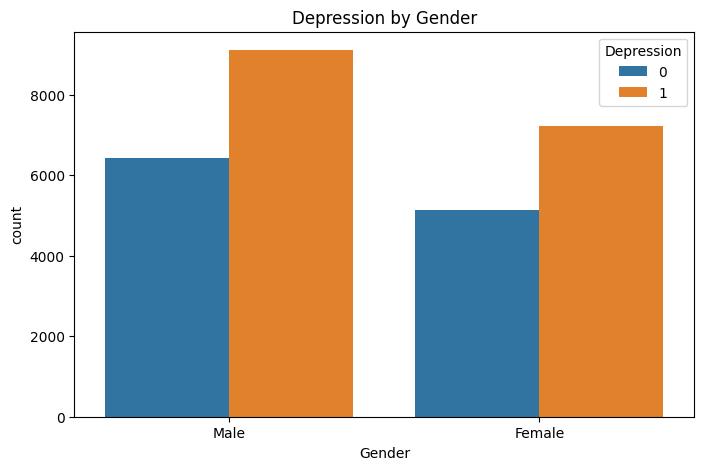

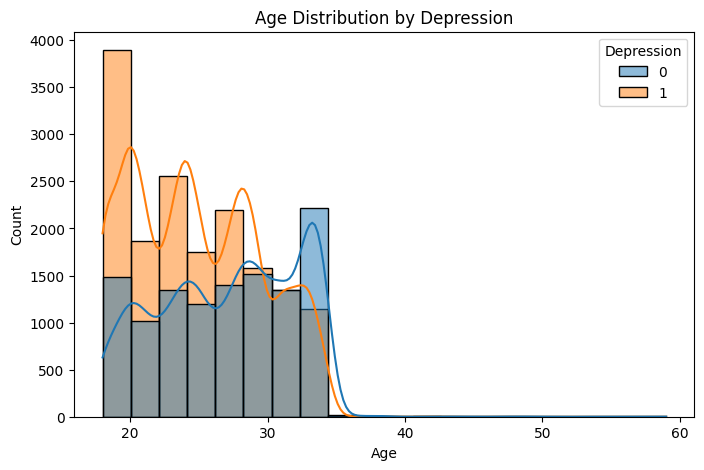

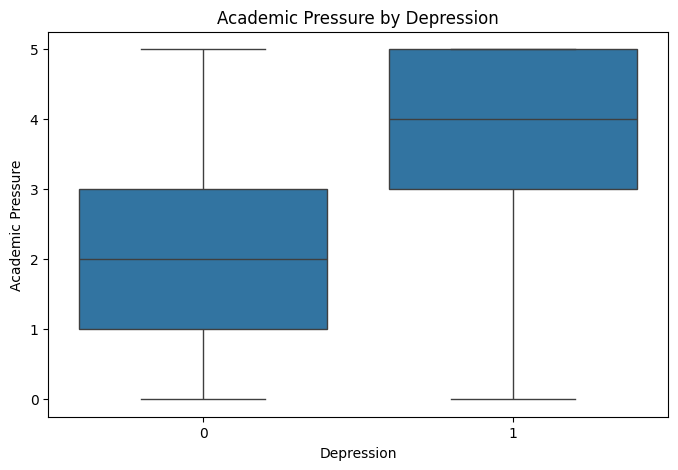

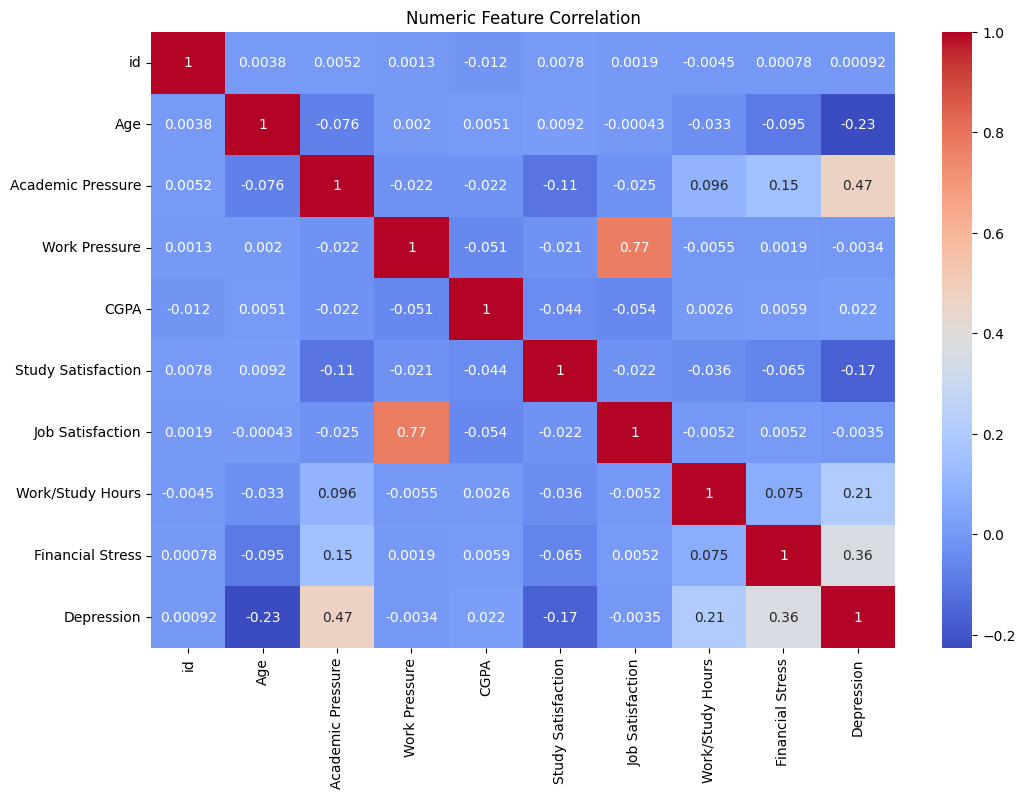

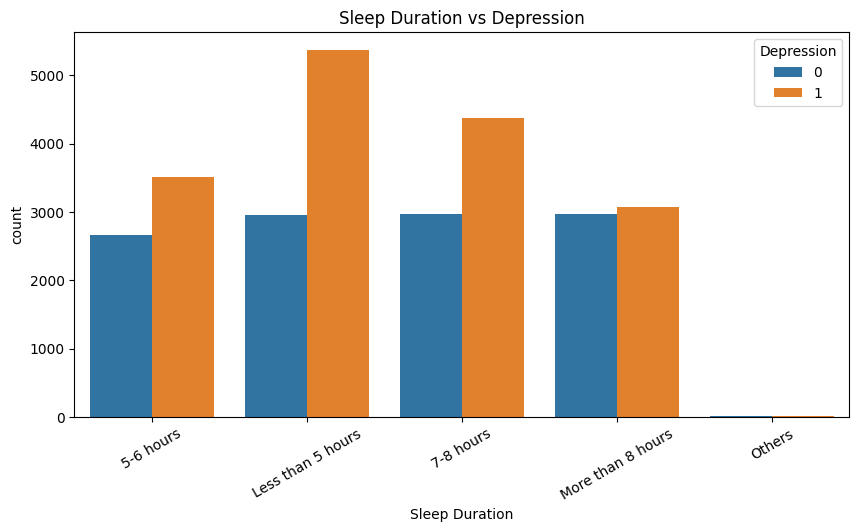

In [21]:
# Task 1: Explore the Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv("Student Depression Dataset.csv")

# 1. Basic Info
print(df.head())
print(df.info())
print(df.describe(include='all'))

# 2. Missing values
print("Missing values:\n", df.isnull().sum())

# 3. Target distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Depression')
plt.title('Depression Distribution')
plt.show()

# 4. Gender vs Depression
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='Depression')
plt.title('Depression by Gender')
plt.show()

# 5. Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Depression', bins=20, kde=True)
plt.title('Age Distribution by Depression')
plt.show()

# 6. Academic Pressure vs Depression
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Depression', y='Academic Pressure')
plt.title('Academic Pressure by Depression')
plt.show()

# 7. Correlation heatmap for numeric features
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Numeric Feature Correlation')
plt.show()

# 8. Sleep Duration vs Depression
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Sleep Duration', hue='Depression')
plt.title('Sleep Duration vs Depression')
plt.xticks(rotation=30)
plt.show()

# (Add more plots as needed for other categorical/numeric features)

In [22]:
# Task 2: Data Preprocessing

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
df = pd.read_csv("Student Depression Dataset.csv")

# 1. Handle missing values
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols = [c for c in cat_cols if c not in ['Depression', 'id']]

# Numerical: fill with mean
imputer_num = SimpleImputer(strategy='mean')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

# Categorical: fill with mode
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# 2. Encode categorical variables
# Label encode binary, one-hot encode multiclass
le = LabelEncoder()
bin_cols = [col for col in cat_cols if df[col].nunique() == 2]
onehot_cols = [col for col in cat_cols if df[col].nunique() > 2]

for col in bin_cols:
    df[col] = le.fit_transform(df[col])

df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)

# 3. Standardize numerical features
features_to_scale = [col for col in num_cols if col not in ['Depression', 'id']]
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# 4. Show resulting DataFrame structure
print(df.head())

# (Justify preprocessing choices in your report/notebook)

     id  Gender       Age  Academic Pressure  Work Pressure      CGPA  \
0   2.0       1  1.463165           1.345543      -0.009777  0.893393   
1   8.0       0 -0.371474          -0.826104      -0.009777 -1.194076   
2  26.0       1  1.055467          -0.102222      -0.009777 -0.425724   
3  30.0       0  0.443921          -0.102222      -0.009777 -1.404862   
4  32.0       0 -0.167625           0.621660      -0.009777  0.322229   

   Study Satisfaction  Job Satisfaction  \
0           -0.693425          -0.01534   
1            1.510636          -0.01534   
2            1.510636          -0.01534   
3           -0.693425          -0.01534   
4            0.041262          -0.01534   

   Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                      1         -1.121213         -1.488868   
1                                      0         -1.121213         -0.793092   
2                                      0          0.497095    

In [25]:
# Task 3: Train the Model
# Use ONLY the original CSV file, and repeat the same preprocessing steps from Task 2 here!

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the CSV
df = pd.read_csv("Student Depression Dataset.csv")

# ----------- Preprocessing (same as Task 2) -----------
# 1. Handle missing values
num_cols = df.select_dtypes(include=[float, int]).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols = [c for c in cat_cols if c not in ['Depression', 'id']]

imputer_num = SimpleImputer(strategy='mean')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# 2. Encode categorical variables
le = LabelEncoder()
bin_cols = [col for col in cat_cols if df[col].nunique() == 2]
onehot_cols = [col for col in cat_cols if df[col].nunique() > 2]

for col in bin_cols:
    df[col] = le.fit_transform(df[col])

df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)

# 3. Standardize numerical features
features_to_scale = [col for col in num_cols if col not in ['Depression', 'id']]
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# ----------- Training -----------
X = df.drop(columns=['Depression', 'id'])
y = df['Depression']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression model
clf = LogisticRegression(max_iter=500, penalty='l2', solver='lbfgs')
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# y_test, y_pred, y_prob are ready for Task 4
print("Model training complete. Predictions and probabilities ready for evaluation.")

Model training complete. Predictions and probabilities ready for evaluation.


Accuracy: 0.8433972406378785
Precision: 0.8575268817204301
Recall: 0.8785189718482252
F1 Score: 0.8678960096735188

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.79      0.81      2313
         1.0       0.86      0.88      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.84      0.84      0.84      5581



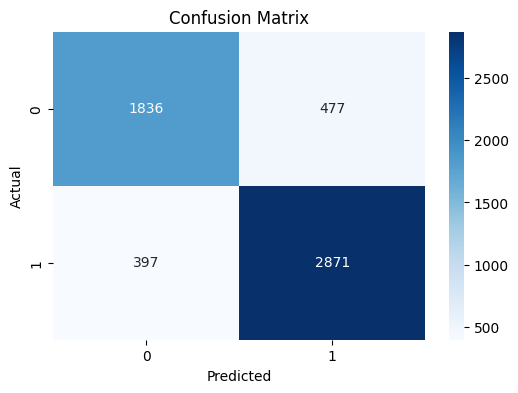

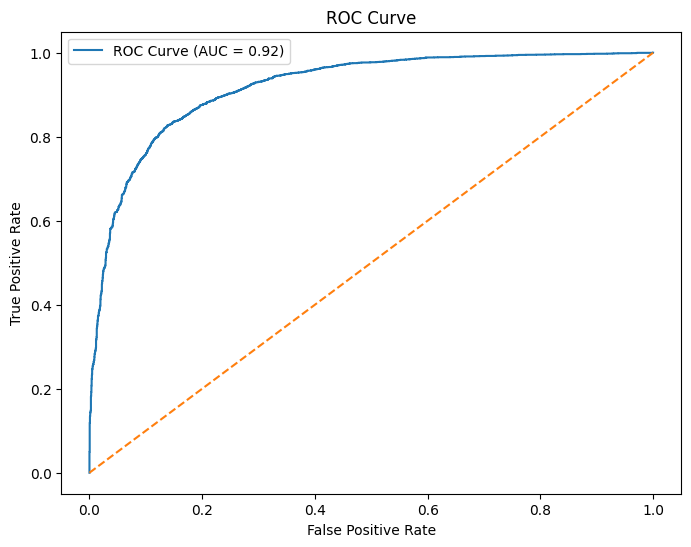

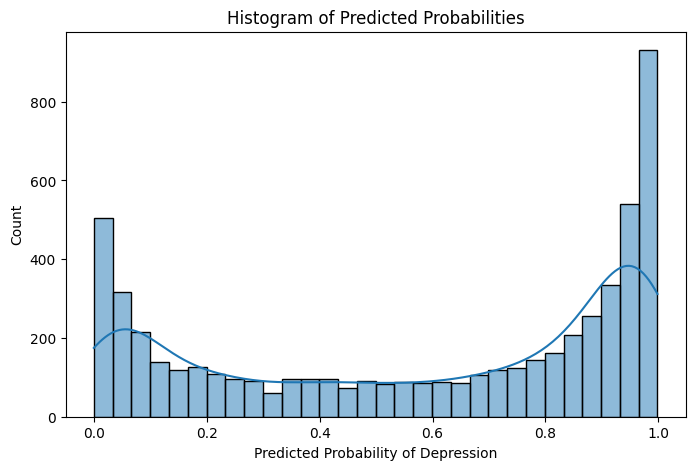

In [26]:
# Task 4: Evaluate the Model

import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score, classification_report
)
import seaborn as sns

# y_test, y_pred, y_prob should come from Task 3

# 1. Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 3. ROC Curve & AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 4. Probability Histogram
plt.figure(figsize=(8, 5))
sns.histplot(y_prob, bins=30, kde=True)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability of Depression')
plt.show()

---
---

## Part two

### Task 1 – Evaluate and Visualize Metric Changes Across Thresholds
    As we have seen in class, different metrics varry according to the threshold. Explain why.

    Compute the TN, TP, FN and FP manually. 
    Find a way to visualise their evolution according to the threshold. 
    Explain the different variations. What does it tell about your predictions ?

    Do the same with evaluation metrics.

    How would you define the optimal threshold ?
    

### Task 2 - Include a financial cost
    In the context of predicting student depression, if the model outputs a positive prediction (the student is predicted as being depressed), you must pay for the student to go to the hospital. 
    This cost is substantial, therefore, it is crucial not only to evaluate the standard classification metrics—such as accuracy, precision, recall, and F1-score—but also to consider the financial implications of your predictions.

    Find a way to define the optimal threshold, including the cost of a positive prediction.


### Task 3 - Cross validation & hyperparameters optimization
    What are the hyperparameters in the logistic regression. 
    Change your code to find the optimal hyperparameters and train it with cross validation
    

### Task 4 - Investigate and understand predictions
    Now that you have an optimized classification (almost), you want to understand why it predicts some students as depressed.
    You might be interested by analysing the difference of feature values for different predicted populations (TP TN FP & FN).
    You could also have a look at the weights of you logistic regression.



### Solution part 2

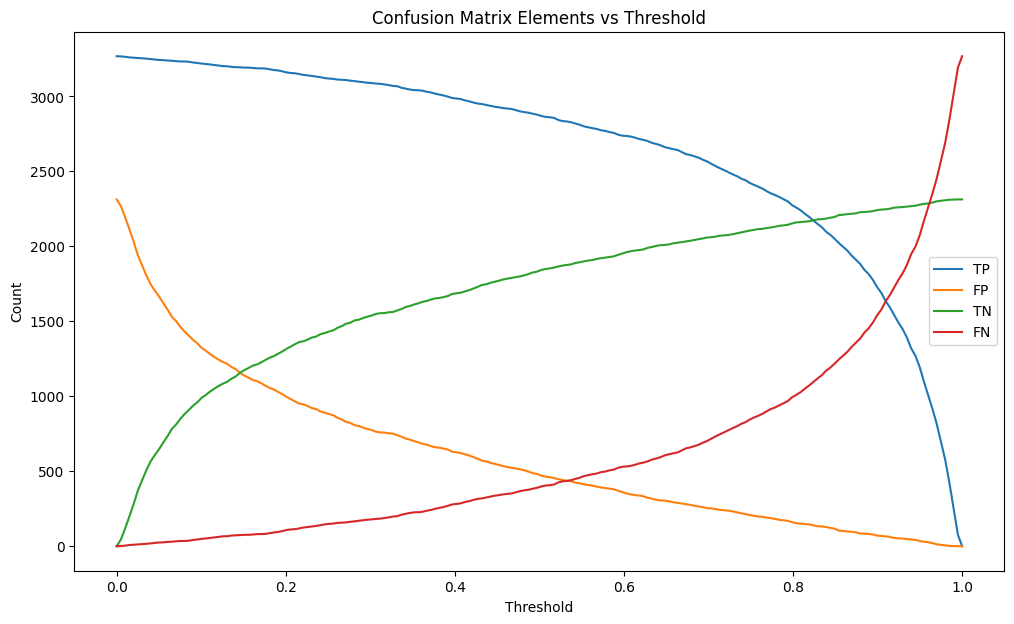

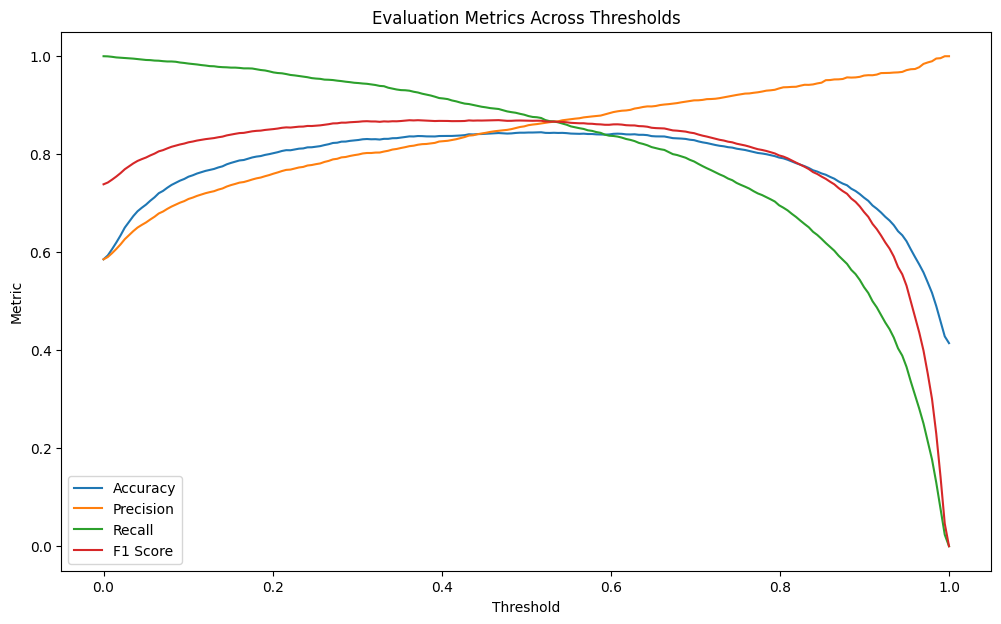

'\n- As the threshold increases, fewer predictions are classified as positive, so TP and FP usually decrease, FN increases.\n- Precision tends to increase with threshold (fewer false positives), recall decreases (more false negatives).\n- The optimal threshold depends on your priorities (see Task 2 for financial considerations).\n'

In [27]:
# Task 1 – Evaluate and Visualize Metric Changes Across Thresholds

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_test, y_prob from your previous logistic regression code
# y_test: true labels (0/1), y_prob: predicted probabilities

thresholds = np.linspace(0, 1, 200)
TPs, TNs, FPs, FNs = [], [], [], []
accuracies, precisions, recalls, f1s = [], [], [], []

for thresh in thresholds:
    y_pred = (y_prob >= thresh).astype(int)
    TP = np.sum((y_test == 1) & (y_pred == 1))
    TN = np.sum((y_test == 0) & (y_pred == 0))
    FP = np.sum((y_test == 0) & (y_pred == 1))
    FN = np.sum((y_test == 1) & (y_pred == 0))
    TPs.append(TP)
    TNs.append(TN)
    FPs.append(FP)
    FNs.append(FN)
    accuracies.append(accuracy_score(y_test, y_pred))
    if TP+FP > 0:
        precisions.append(precision_score(y_test, y_pred, zero_division=0))
    else:
        precisions.append(1.0)
    if TP+FN > 0:
        recalls.append(recall_score(y_test, y_pred, zero_division=0))
    else:
        recalls.append(0.0)
    if TP+FP > 0 and TP+FN > 0:
        f1s.append(f1_score(y_test, y_pred, zero_division=0))
    else:
        f1s.append(0.0)

plt.figure(figsize=(12, 7))
plt.plot(thresholds, TPs, label='TP')
plt.plot(thresholds, FPs, label='FP')
plt.plot(thresholds, TNs, label='TN')
plt.plot(thresholds, FNs, label='FN')
plt.xlabel('Threshold')
plt.ylabel('Count')
plt.title('Confusion Matrix Elements vs Threshold')
plt.legend()
plt.show()

plt.figure(figsize=(12, 7))
plt.plot(thresholds, accuracies, label='Accuracy')
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1s, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Metric')
plt.title('Evaluation Metrics Across Thresholds')
plt.legend()
plt.show()

# EXPLANATION (add in your notebook/report):
"""
- As the threshold increases, fewer predictions are classified as positive, so TP and FP usually decrease, FN increases.
- Precision tends to increase with threshold (fewer false positives), recall decreases (more false negatives).
- The optimal threshold depends on your priorities (see Task 2 for financial considerations).
""" 

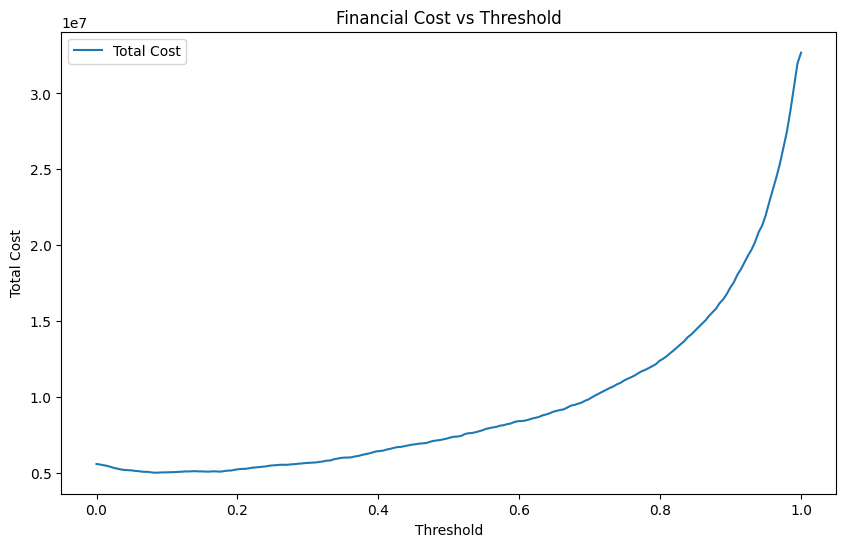

Optimal threshold considering cost: 0.09, with total cost: 5005000


'\nThe optimal threshold is where total cost is minimized. \nAdjust cost_positive and cost_fn to reflect real-world consequences for your use-case.\n'

In [28]:
# Task 2 - Include a financial cost

import numpy as np
import matplotlib.pyplot as plt

# Define costs
cost_positive = 1000  # Cost for each positive (send to hospital)
cost_fn = 10000       # Cost (penalty) for missing a depressed student (False Negative)
cost_tn = 0           # No cost for true negative
cost_fp = cost_positive  # Cost for false positive is the same as true positive
cost_tp = cost_positive  # Cost for true positive is the same as true positive

total_costs = []

for thresh in thresholds:
    y_pred = (y_prob >= thresh).astype(int)
    TP = np.sum((y_test == 1) & (y_pred == 1))
    TN = np.sum((y_test == 0) & (y_pred == 0))
    FP = np.sum((y_test == 0) & (y_pred == 1))
    FN = np.sum((y_test == 1) & (y_pred == 0))
    total_cost = (TP * cost_tp) + (FP * cost_fp) + (FN * cost_fn) + (TN * cost_tn)
    total_costs.append(total_cost)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, total_costs, label='Total Cost')
plt.xlabel('Threshold')
plt.ylabel('Total Cost')
plt.title('Financial Cost vs Threshold')
plt.legend()
plt.show()

optimal_idx = np.argmin(total_costs)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold considering cost: {optimal_threshold:.2f}, with total cost: {total_costs[optimal_idx]}")

# EXPLANATION:
"""
The optimal threshold is where total cost is minimized. 
Adjust cost_positive and cost_fn to reflect real-world consequences for your use-case.
"""

In [31]:
# Task 3 - Cross Validation & Hyperparameters Optimization

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameter grid for logistic regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],           # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs'],       # Different solvers
    'penalty': ['l2'],                      # Use l2 regularization
    'max_iter': [100, 300, 500]
}

lr = LogisticRegression()
grid = GridSearchCV(lr, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X, y)  # Use all data for CV

print("Best parameters:", grid.best_params_)
print("Best cross-validated F1 score:", grid.best_score_)

# Use best estimator for further predictions
best_lr = grid.best_estimator_

# Re-train on the full dataset or split again as needed

Best parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validated F1 score: 0.8724702387313525


                    TP_mean   TN_mean   FP_mean   FN_mean
Gender             0.559334  0.549593  0.561966  0.572539
Age               -0.246915  0.319734 -0.034339  0.139204
Academic Pressure  0.490548 -0.737041  0.105043 -0.411654
Work Pressure      0.029661 -0.009777 -0.009777 -0.009777
CGPA               0.015649 -0.056896 -0.005197 -0.037479
...                     ...       ...       ...       ...
Degree_ME          0.005205  0.007046  0.010684  0.023316
Degree_MHM         0.007287  0.010298  0.012821  0.007772
Degree_MSc         0.041985  0.040108  0.034188  0.028497
Degree_Others      0.001041  0.000542  0.000000  0.002591
Degree_PhD         0.017002  0.015176  0.010684  0.020725

[109 rows x 4 columns]
                                  Feature    Weight
7   Have you ever had suicidal thoughts ?  2.465466
2                       Academic Pressure  1.150339
81               Dietary Habits_Unhealthy  1.058028
9                        Financial Stress  0.789250
79                Di

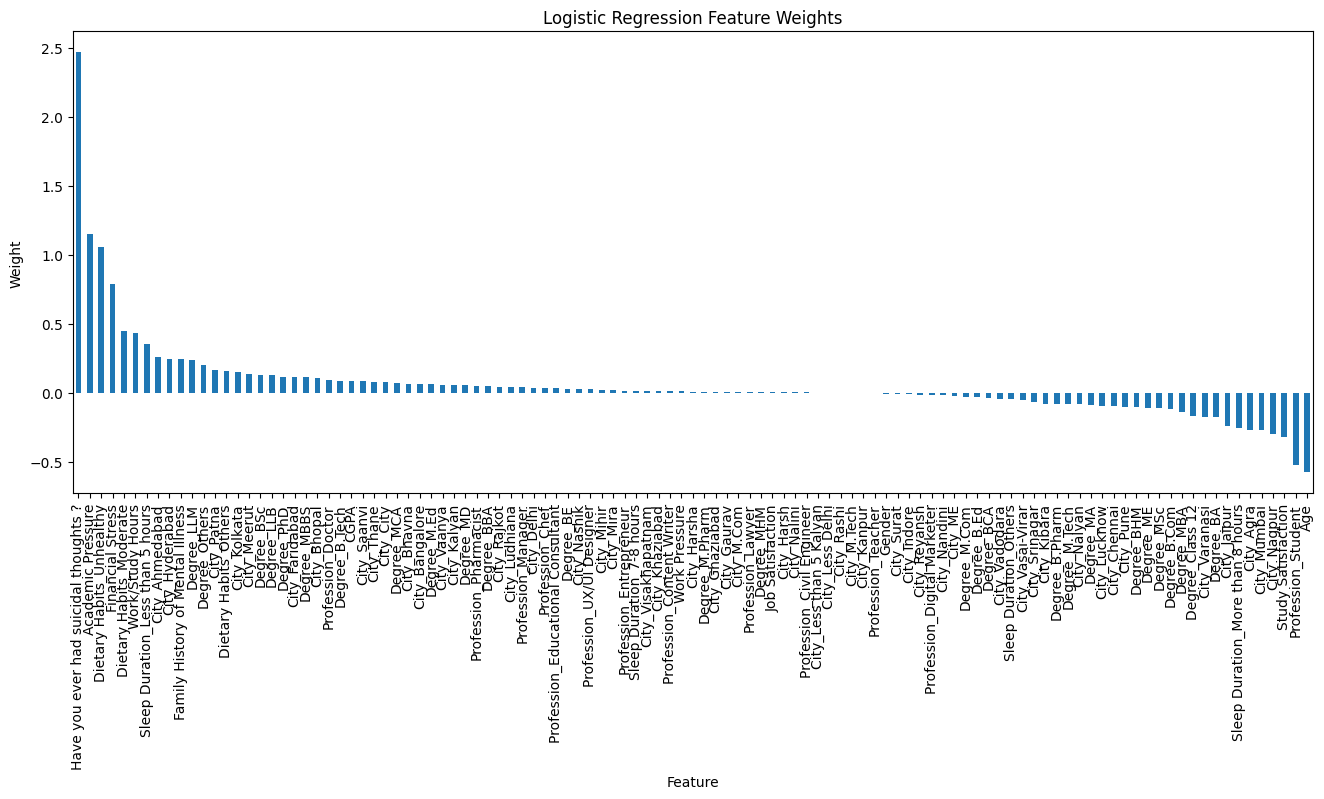

'\n- Analyze which features are most influential (highest magnitude weights).\n- Compare mean feature values in TP, TN, FP, FN to spot patterns (e.g., are FPs more likely for a certain group?).\n- This helps interpret why the model makes certain predictions.\n'

In [32]:
# Task 4 - Investigate and understand predictions

import pandas as pd
import numpy as np

# Let's use the best estimator from Task 3
# Split as before if needed:
# X_train, X_test, y_train, y_test

y_pred = best_lr.predict(X_test)
y_prob = best_lr.predict_proba(X_test)[:, 1]

# Find indices for TP, TN, FP, FN
TP_idx = np.where((y_test == 1) & (y_pred == 1))[0]
TN_idx = np.where((y_test == 0) & (y_pred == 0))[0]
FP_idx = np.where((y_test == 0) & (y_pred == 1))[0]
FN_idx = np.where((y_test == 1) & (y_pred == 0))[0]

# Analyze feature averages for each group
tp_mean = X_test.iloc[TP_idx].mean()
tn_mean = X_test.iloc[TN_idx].mean()
fp_mean = X_test.iloc[FP_idx].mean()
fn_mean = X_test.iloc[FN_idx].mean()

df_feat_compare = pd.DataFrame({
    "TP_mean": tp_mean,
    "TN_mean": tn_mean,
    "FP_mean": fp_mean,
    "FN_mean": fn_mean
})
print(df_feat_compare)

# Investigate model coefficients ("weights")
feature_names = X_test.columns
coefs = best_lr.coef_[0]
coef_df = pd.DataFrame({'Feature': feature_names, 'Weight': coefs})
coef_df = coef_df.sort_values('Weight', ascending=False)
print(coef_df)

# Optional: Plot feature importances
coef_df.set_index('Feature').plot(kind='bar', figsize=(16, 6), legend=False)
plt.title('Logistic Regression Feature Weights')
plt.ylabel('Weight')
plt.show()

# EXPLANATION:
"""
- Analyze which features are most influential (highest magnitude weights).
- Compare mean feature values in TP, TN, FP, FN to spot patterns (e.g., are FPs more likely for a certain group?).
- This helps interpret why the model makes certain predictions.
"""

In [33]:
# trh 